In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit 
from scipy.stats import linregress as lr
import csv
from scipy.stats import norm

#Ejecutar mediciones en orden, se repiten el nombre de las variables. Por lo que para ejecutar el código de otra medición
#es necesario compilar la celda para la viable almacene la nueva información

In [2]:
datos = np.genfromtxt('/home/juangarcia/Escritorio/Tareas Cs. Udec/Tareas S4/Tareas-S4/Laboratorio 1/Tarea 3/Base de datos/Raw_Data1.csv',delimiter=",")
t = datos[:,0] #tiempo con Nan
a = datos[:,3] #aceleración en el eje Z con Nan
p = len(a)
print(p)

63741


In [3]:
a_z = a[1:p] #aceleración en el eje Z sin Nan
T = t[1:p] #timpo sin Nan
n = len(a_z)
N_med =np.arange(1,n+1) #número de mediciones
print("Aceleración máxima medida",np.amax(a_z))
print("Aceleración mínima medida",np.amin(a_z))
L = np.amax(a_z)+0.1
l = np.amin(a_z)-0.1


Aceleración máxima medida 9.891928673
Aceleración mínima medida 9.791430473


# B. Grafique sus datos en un gráfico donde en el eje horizontal se muestre el número de su medición y en el eje vertical el valor del dato $a_{z}$ regristrado.

Text(0.5, 1.0, 'Aceleración vertical por el N° de medida')

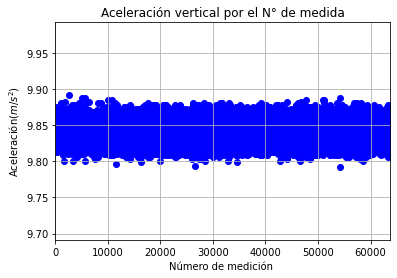

In [4]:
plt.scatter(N_med,a_z,c="blue")
plt.grid(True)
plt.xlabel('Número de medición ')
plt.ylabel('Aceleración($m/s^2$)')
plt.xlim(0,len(N_med)+1)
plt.ylim(l,L)
plt.title('Aceleración vertical por el N° de medida')

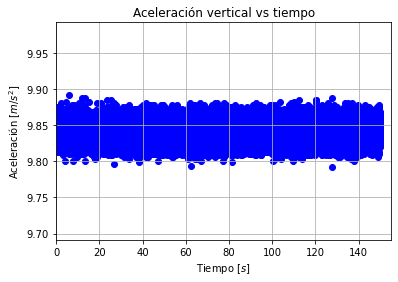

In [177]:
plt.scatter(T,a_z,c="blue")
plt.xlim(0,155)
plt.ylabel('Aceleración $[m/s^2]$')
plt.xlabel('Tiempo $[s]$ ')
plt.xlim(0,155)
plt.ylim(l,L)
plt.title('Aceleración vertical vs tiempo')
plt.grid(True)

# C. Calcule el valor medio y la desviación estándar de sus datos.



### El promedio de cada tiempo se calcula como : 
\begin{equation}
\bar{a} =  \frac{1}{N}\sum_{i=1}^{N} a_{i} \ , \   \   
\end{equation}


In [5]:
valor_medio = np.mean(a_z)
print("El valor medio de los datos es ",valor_medio)

El valor medio de los datos es  9.842434411986961


### Por otro lado, la desviación estandar se calcula como: 
\begin{equation}
s_{a} = \sqrt{\frac{1}{N-1}\sum_{i=1}^{N} (a_{i}- \bar{a})^2}  \ , \   \   j = {1,2}
\end{equation}


In [6]:
desv_standar = np.std(a_z,ddof=1)
print("La desviación estandar de los datos es",desv_standar)

La desviación estandar de los datos es 0.011172288292462088


# D. Confeccione un histograma de sus datos separándolos en 20 "bins". Comente las características que observa en el histograma. ¿Que función cree que podría describir la tendencia general del histograma?

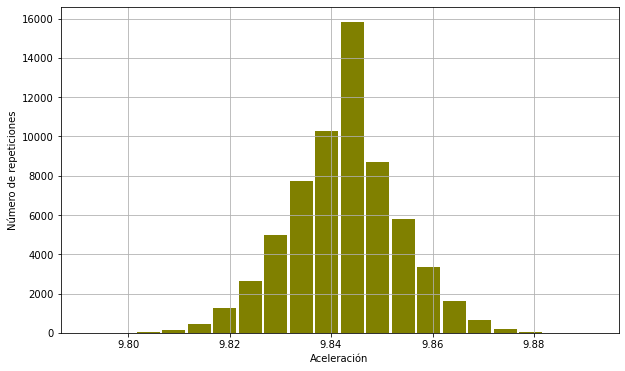

In [7]:
#Histograma
plt.figure(figsize=(10,6))
plt.hist(a_z,bins=20, rwidth=0.90, range=(np.min(a_z),np.max(a_z)), color='olive')
plt.xlabel('Aceleración')
plt.ylabel('Número de repeticiones')
plt.grid(True)

Debemos encontrar una curva  que represente el comportamiento general de los datos, es decir, ajustar un modelo. Dicho modelo no necesariamente interceptará cada uno de los puntos. Estamos estudiando datos que  presentan ruido y por este motivo es que no podemos considerar cada punto de manera individual, ya que este podría ser incorrecto. El modelo (la dependencia funcional entre las variables) que deseamos encontrar debe describir el patrón del conjunto de puntos. 


## Notar que los datos se distribuyen de manera tal manera que es posible describir el histograma mediante la  campana de Gauss o distribución normal.

Es por ello que usaremos el método de Mínimos Cuadrados para una función arbitraria, en este caso la función  es 

\begin{equation}
    f(x) = a \cdot e^{\frac{-(x-b)^2}{2c^{2}}}
\end{equation}


# E. Realice un ajuste de los datos del histograma (número de datos en el intervalo correspondiete a c/u de los 20 bins) con la función cometada en el punto anterior.

In [10]:
hist, bin_edges = np.histogram(a_z,bins=20)
bin_size = bin_edges[1]-bin_edges[0] # calculo el ancho de los bins del histograma
N=len(a_z) # número de datos

## Ajuste con función norm, a partir de la definición de la función  densidad de probabilidad de una variable $a_{z}$ que se encuentra normalmente distribuida.

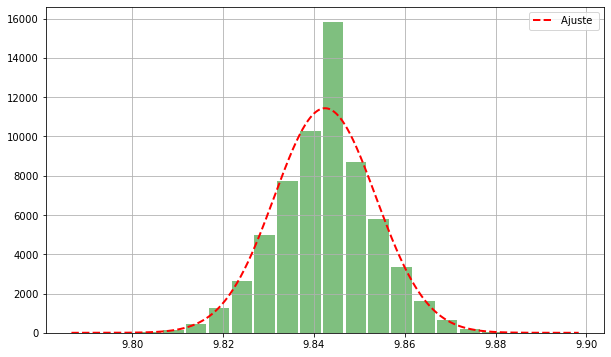

[0.04262169 0.04265514 0.04268861 ... 0.04268861 0.04265514 0.04262169]


In [12]:
mu = np.mean(a_z) #Calcula la media 
sigma =np.std(a_z) #desviación estandar
x_gaussiana=np.linspace(mu-5*sigma,mu+5*sigma,num=N) # arma una lista de puntos donde se desea graficar la distribución de ajuste
gaussiana=norm.pdf(x_gaussiana, mu, sigma)*N*bin_size # calcula la gaussiana usando la función norm importada desde scipy.stats

plt.figure(figsize=(10,6))
plt.plot(x_gaussiana,gaussiana,'r--', linewidth=2, label='Ajuste ') #gráfico la gaussiana 
plt.hist(a_z,bins=20, rwidth=0.90, range=(np.min(a_z),np.max(a_z)), color='green',alpha = 0.5)
plt.grid(True)
plt.legend()
plt.show()
print(gaussiana)


# Ajuste por MC no lineales

Consideramos un conjunto de $len(a_{z})$ observaciones y una curva (función del modelo) y$=f(x,\beta) $ que además de la variable $x$ también depende de $n$ parámetros, $\beta = (\beta_{1},\beta_{2},...,\beta_{n})$ con $n< len(a_{z})$ Se desea encontrar el vector $\beta$  de parámetros tales que la curva se ajuste mejor a los datos dados en el sentido de mínimos cuadrados, es decir, la suma de cuadrados: 
\begin{equation}
    \chi^{2} = \sum_{i=1}^{m} \left (y_{i}-f(x_{i},\beta )  \right )^{2}
\end{equation}

El mínimo valor de $\chi^{2}$ se produce cuando el gradiente es cero. Dado que el modelo contiene $n$ parámetros hay $n$ ecuaciones de gradiente:

\begin{align}
\frac{\partial \chi^{2} }{\partial \beta_{j}} &= 2 \sum_{i} r_{i} \frac{\partial r_{i}}{\partial \beta_{j}} = 0 \\
 &r_{i} = (y_{i}-f(x_{i},\beta )  ; j = (1,...,n)
\end{align}

En un sistema no lineal, las derivadas $\frac{\partial r_{i}}{\partial \beta_{j}} $ son funciones tanto de la variable independiente como de los parámetros, por lo que estas ecuaciones gradiente no tienen una solución cerrada. En lugar de ello, los valores iniciales deben ser elegidos para los parámetros. Entonces, los parámetros se refinan iterativamente, es decir, los valores se obtienen por aproximación sucesiva:

\begin{equation}
    \beta_{j} \approx \beta_{j}^{k+1} = \beta_{j}^{k} + \Delta \beta_{j} 
\end{equation}

Aquí $k$ es un número de iteración y el vector de incrementos,$\Delta \beta$ que se conoce como el vector de desplazamiento. En cada iteración del modelo se linealiza por aproximación a un primer orden en serie de Taylor de expansión sobre $\beta^{k} $:
\begin{align}
    f(x_{i}.\beta) &\approx f(x_{i},\beta^{k}) + \sum_{j}\frac{\partial f(x_{i},\beta^{k})}{\partial\beta_{j}}\left (\beta_{j} - \beta_{j}^{k}  \right )\\
    &\approx f(x_{i},\beta^{k}) + \sum_{j} J_{ij}\Delta \beta_{j}
\end{align}

El jacobiano , $J$, es una función de las constantes, la variable independiente y los parámetros, por lo que cambia de una iteración a la siguiente. Por lo tanto, en términos del modelo linealizado, $\frac{\partial r_{i}}{\partial \beta_{j}} = -J_{ij} $ y los residuos se dan por

\begin{equation}
    r_{i} = \left (y_{i} - f(x_{i},\beta^{k})  \right ) -\sum_{s=1}^{n} J_{is}\Delta \beta_{s} 
\end{equation}

Sustituyendo estas expresiones en las ecuaciones de gradiente, se convierten  

\begin{equation}
        -2\sum_{i=1}^{m} J_{ij}\left (\left (y_{i} - f(x_{i},\beta^{k})  \right )-\sum_{s=1}^{n} J_{is}\Delta \beta_{s}   \right ) = 0
\end{equation}
que, en el reordenamiento, convertido en $n$ ecuaciones lineales simultáneas, las ecuaciones normales 

\begin{equation}
    \sum_{i=1}^{m} \sum_{s=1}^{n} J_{ij} J_{is}\Delta \beta_{s}   = \sum_{i =1}^{m} J_{ij}\Delta y_{i} \ \  ; j = (1,...,n)
\end{equation}

con $ \Delta y_{i} = \left (y_{i} - f(x_{i},\beta^{k})  \right )$. Luego, las ecuaciones normales se escriben en notación matricial como
\begin{equation}
    \left (J^{T}J  \right )\Delta \beta = J^{T}\Delta y 
\end{equation}

Cuando las observaciones no son igualmente fiable (la dispersión no es la misma para
cada uno de los $y_i$, lo que implicaría que no todos los $y_i$ tienen la misma variabilidad), una suma ponderada de los cuadrados puede ser minimizado. El método de mínimos cuadrados ponderados, contempla diferentes pesos para cada uno de los valores medidos, según el grado de dispersión de cada uno de estos. A cada medición se le asocia un peso $w_{i}$, tal que
\begin{equation}
    \chi ^{2} = \sum_{i =1}^{m} W_{ii}r_{i}^{2}
\end{equation}

Cada elemento de la matriz de peso diagonal W debería, idealmente, ser igual al recíproco de la varianza de error de la medida (  es decir que los pesos sean inversamente proporcionales a la incertidumbre, es decir, le daríamos mayor credibilidad a los $y_{i}$ con menos incertidumbre y menor credibilidad a los $yi$ con mayor incertidumbre.). Esto implica que las observaciones no están correlacionadas. Si las observaciones están correlacionadas, aplica la expresión siguiente:

\begin{equation}
        \chi ^{2} =  \sum_{k =1}\sum_{j =1} r_{k} W_{kj}r_{j}
\end{equation}
En este caso, la matriz de pesos debería idealmente ser igual a la inversa de la matriz error -covarianza de error de las observaciones.Las ecuaciones normales son entonces:

\begin{equation}
    \left (J^{T}W J  \right )\Delta \beta = J^{T}W\Delta y 
\end{equation}

En mínimos cuadrados lineales la función objetivo, $\chi ^{2}$, es una función cuadrática de los parámetros.Con dos o más parámetros, los contornos de $\chi ^{2}$ con respecto a cualquier par de parámetros serán elipses concéntricas. Los valores de los parámetros mínimos se encuentran en el centro de las elipses. Cuanto más los valores de los parámetros difieren de sus valores óptimos, más los contornos se desvían de la forma elíptica. Una consecuencia de esto es que las estimaciones de parámetros iniciales deben ser lo más cercanas posible a sus valores óptimos (desconocidos!). También explica cómo la divergencia puede surgir y como el algoritmo de Gauss-Newton es convergente sólo cuando la función objetivo es aproximadamente cuadrática en los parámetros.


## Ajuste con curve_fit

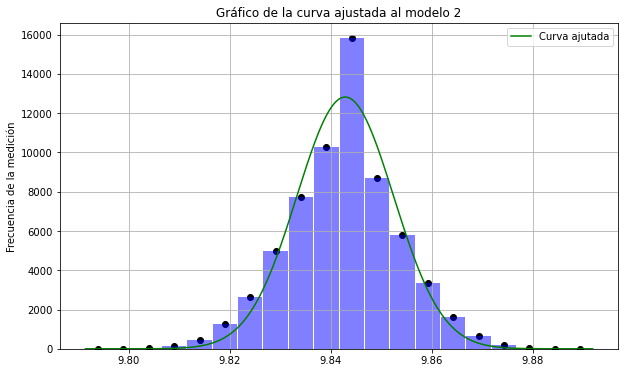

In [13]:
xx = np.linspace(np.min(a_z),np.max(a_z), 2000) 
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2 #(valor del centro de cada "bins" o marca de clase) (perdida de grados de libertad)
def gauss(x, *p):
    A, B, C = p
    return (A) *np.exp((-(x-B)**2)/(2*(C**2))) #función gaussiana definida explicitamente

# pk es la estimación inicial de los coeficientes de ajuste (A, B y C)
pk = [0, 1, 2]

#coeff = parámetros óptimos hallados y matrix = es la matriz de covarianza de los parámetros hallados.

coeff,matrix = curve_fit(gauss, bin_centers, hist,pk) #funcion curve fit que entrega un arreglo con dos arreglos
                                                    
hist_ajustado = gauss(bin_centers, *coeff)  #curva ajustada

plt.figure(figsize=(10,6)) 
plt.scatter(bin_centers,hist, color = "black")
#plt.plot(bin_centers, hist,color = "olive")
plt.plot(xx,gauss(xx,*coeff), label='Curva ajutada',color = "green")
plt.hist(a_z, bins=20, color='blue',alpha=0.5,rwidth=0.96)
plt.title('Gráfico de la curva ajustada al modelo 1')
plt.ylabel('Frecuencia de la medición')
plt.title('Gráfico de la curva ajustada al modelo 2')
plt.legend()
plt.grid(True)

### Curvefit no  funciona correctamente ya que; la fórmula para la covariaza de parámetros  ofrece limitaciones en función de la elección de  ciertos parametros iniciales $p_{k}$  

Para el caso del ajuste presetado notamos que la covarianza de los parametros no puede ser estimada, puesto que si la matriz jacobiana en la solución no presenta un rango completo, entonces este método no es capaz de otorgar una matriz de covarianza.

En mínimos cuadrados lineales la función objetivo,  𝜒2 , es una función cuadrática de los parámetros. Como se comentó, en un sistema no lineal, las derivadas $\frac{\partial r_{i}}{\partial \beta_{j}} $ son funciones tanto de la variable independiente como de los parámetros, por lo que estas ecuaciones gradiente no tienen una solución cerrada. En lugar de ello, los valores iniciales deben ser elegidos para los parámetros. Entonces, los parámetros se refinan iterativamente, es decir, los valores se obtienen por aproximación sucesivas. Es por ello que decimos que el  jacobiano , $J$, es una función de las constantes, la variable independiente y los parámetros, por lo que cambia de una iteración a la siguiente.  Cuanto más los valores de los parámetros difieren de sus valores óptimos, más los contornos se desvían de la forma elíptica (recordemos que l valores de los parámetros mínimos se encuentran en el centro de las elipses). Esto explica cómo la divergencia puede surgir cando la función objetivo no es aproximadamente cuadrática en los parámetros y que no sea posible que la función Curvefit pueda calcular una fórmula para la covarianza de parámetros. 

Estos problemas de mal acondicionamiento y divergencia se pueden corregir mediante la búsqueda de estimaciones de parámetros iniciales que están cerca de los valores óptimos. Para el algoritmo presentado, se probaron computacionalmente diferentes valores iniciales, ingresando manualmente valores para $p0$. 

## En vista de lo anterior, en lo sucesivo se presenta un modelo alternativo que obtenemos  imponiendo ciertas hipótesis y usando la función polyfit.

Consideremos la expresión $f(x) = y = a \cdot e^{-b(x+c)^2}$, que imponiendo algunas hipótesis (restricciones sobre $a$) podemos expresar como un polinomio del tipo
\begin{align}
    z &= ln(y) \\
    &= ln(a) -b(x+c)^2\\
    & \Rightarrow z = \alpha x^2 + \beta x + \gamma
\end{align}

con $\alpha = -b, \beta = -2bc, \gamma = ln(a)-bc^2$. Es decir aplicando una transformación biyectiva. 

Text(0.5, 1.0, 'Gráfico de la aceleración v/s log de la frecuencia')

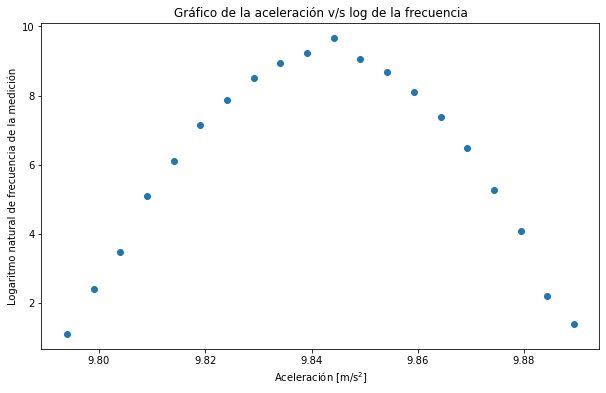

In [17]:
def gauss_2(x, a,b,c):
    return a*np.exp(-b*((x+c)**2)) #función gaussiana propuesta
log_hist = np.log(hist)  #logaritmo de la frecuencia


plt.figure(figsize=(10,6))
plt.scatter(bin_centers, log_hist)
plt.xlabel('Aceleración [m/s$^2$]')
plt.ylabel('Logaritmo natural de frecuencia de la medición')
plt.title('Gráfico de la aceleración v/s log de la frecuencia')

###   El orden del polinomio es provisto por el cálculo presentado en el inicio; sin embargo, es improtante remarcar que al tratarse de un modelo de regresión resulta conveniente trabajar con polinomios de grado bajo ; ya que no buscamos conseguir de una función que  conecte todos los puntos ( este ejercicio es útil para modelos de interpolación), solamente buscamos estudiar el comportamiento de  los datos.

Text(0.5, 1.0, 'Gráfico del polonimio ajustado en')

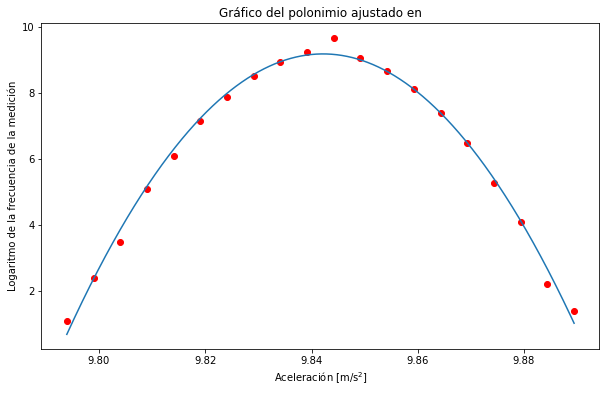

In [19]:
p = np.polyfit(bin_centers,log_hist,2)#Ajuste a un polinomio de grado 2 donde p es un arreglo con los coeficientes
x_x = np.linspace(np.min(bin_centers),np.max(bin_centers),20000) #arreglo donde desea evaluar el polinomio
Pyy = np.polyval(p,x_x) #Evaluamos el polinomio

plt.figure(figsize=(10,6))
plt.scatter(bin_centers, log_hist, c='red') #puntos (marca de clase, log(frecuencia))
plt.plot(x_x,Pyy)                           #polinomio evaluado (curva ajustada)
plt.xlabel('Aceleración [m/s$^2$]')
plt.ylabel('Logaritmo de la frecuencia de la medición')
plt.title("Gráfico del polonimio ajustado en" )

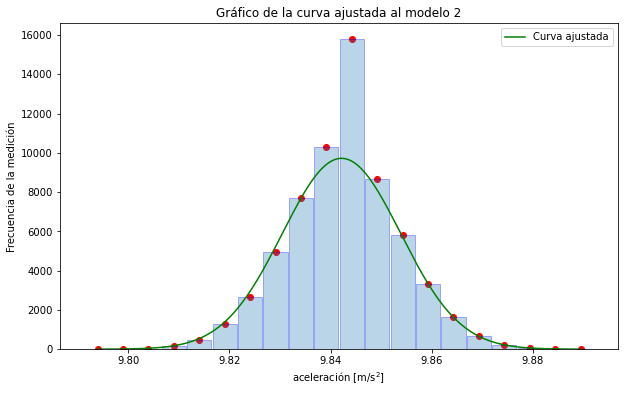

In [30]:
alpha, beta, gamma =p #parametros encontrados por polyfit
b = -alpha            #retornando a los paramétros iniciales
c = -beta/(2*b)
a = np.exp(gamma + b*c**2)
y_y = gauss_2(x_x,a,b,c) #función gaussiana evaluada en el arreglo y usando los parametros encotrados

plt.figure(figsize=(10,6))
plt.hist(a_z, bins=20, edgecolor='blue', rwidth=0.95, alpha=0.3) #histograma
plt.scatter(bin_centers,hist, c='r')                             #puntos
plt.plot(x_x, y_y, c='green', label='Curva ajustada')            #curva ajustada
plt.xlabel('Aceleración [m/s$^2$]')
plt.ylabel('Frecuencia de la medición')
plt.xlabel('aceleración [m/s$^2$] ')
plt.ylabel('Frecuencia de la medición')
plt.title('Gráfico de la curva ajustada al modelo 2')
plt.legend()

# F: Realice un análisis de los residuos de su ajuste.

Las diferencias entre los datos medidos y la predicción realizado por el modelo propuesto; es decir son la diferenia entre el valor observado  y el valor ajustado por el modelo. Las métricas mas utilizadas para medir la caldiad del ajuste son el error estándar de los residuos y el coefiene de determinación.  El error estándar de los residuos $\epsilon_{res}$  mide la desviación promedio cualquier punto estimado por el modelo respecto de la curva de regresión. 
\begin{equation}
    \epsilon_{res} = \sqrt{ \frac{\sum \left (y_{i}- \hat{y_{i}} \right )^2 }{n-2}}
\end{equation}

El coeficiente de determinación $R^{2}$ describe la proporción de varianza de la viarable respuesta explicada por el modelo y relativa a la varianza total. Su valor está acotado entre 0  1. Al ser adiensional, presenta la ventaja frente al error estándar resitual de ser más fácil de interpetar. 

\begin{equation}
    R^{2}= \frac{SCT-SCE}{SCT}
\end{equation}
Donde $SCT$ es la suma de los cuadrados totales y $SCE$ es la suma de los cuadrados residuales


## Residuos para el modelo con curve_fit

Text(0.5, 1.0, 'Gráfico de residuos 1')

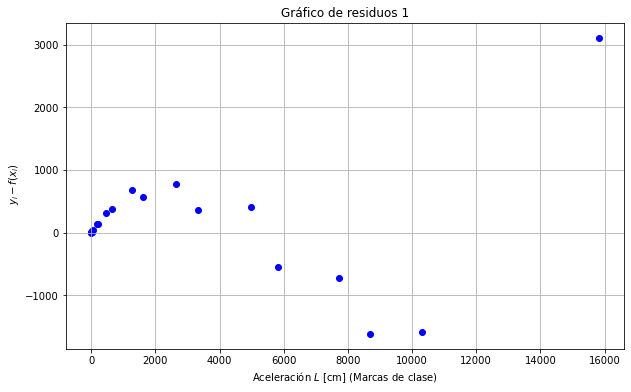

In [28]:
res = hist - gauss(bin_centers,*coeff) #(diferencia entre el arrreglo que contiene los datos medidos (frecuencias)
                         #y los valores proporcionados por el modelo (la función evaluada en la marca de clase)

plt.figure(figsize=(10,6))
plt.scatter(hist, res, color='blue') # puntos (frecuncia, residuos)
plt.grid(True)
plt.xlabel('Aceleración $L$ [cm] (Marcas de clase)')
plt.ylabel('$\\ y_i -f(x_i)$')
plt.title('Gráfico de residuos 1')

## Residuos para el modelo con polyfit

Text(0.5, 1.0, 'Gráfico de residuos 2')

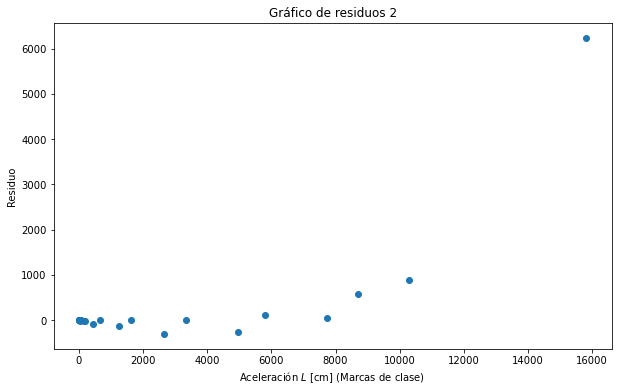

In [31]:
res = (hist - gauss_2(bin_centers,a,b,c))

plt.figure(figsize=(10,6))
plt.scatter(hist, res)
plt.ylabel('Residuo')
plt.xlabel('Aceleración $L$ [cm] (Marcas de clase) ')
plt.title('Gráfico de residuos 2')

## Análisis del coeficiente de determinación $R^{2}$

Matemáticamente se define como $R^{2}= \frac{SCT-SCE}{SCT}  $ 


Es un medida relativa del grado de asociación lineal entre dos variables y representa la proporción de la variaión explicada por la regresión. 

Si $R^{2} \rightarrow 0 \Rightarrow$ Baja capacidad explicativa de la curva ajustada


Si $R^{2} \rightarrow 1 \Rightarrow$ Alta capacidad explicativa de la curva ajustada


In [32]:
#𝑆𝐶𝑇  es la suma de los cuadrados totales y  𝑆𝐶𝐸  es la suma de los cuadrados residuales

SCT = np.sum((hist-np.mean(hist))**2) #frecuencia - media de la frecuencia al cuadrado
SCE = np.sum((hist-gauss(bin_centers,*coeff))**2) #frecuencia - función evaluada en marca de clase l cuadrado
RR= (SCT-SCE)/SCT            
SCT_1 = np.sum((hist-np.mean(hist))**2)
SCE_1 = np.sum((hist-gauss_2(bin_centers,a,b,c))**2)
RR_1= (SCT_1-SCE_1)/SCT_1
print("El coeficinte de determinación para el primer modelo es R^2 =",RR)
print("El coeficinte de determinación para el segundo modelo es R^2= ",RR_1)

El coeficinte de determinación para el primer modelo es R^2 = 0.9523348888137732
El coeficinte de determinación para el segundo modelo es R^2=  0.8909180529834402


### De acuerdo a los criterios previamente enunciados, concluimos que el modelo 1 se aunsta mejor a los datos, pero sujeto a la correcta determinación de parametros iniciales. 



## G. Repita todo el proceso anterior con nuevos datos obtenidos de forma similar, pero ahora sosteniendo el celular con su mano mientras realiza la medición. (No mueva su mano mientras toma los datos!)

# Datos medición 2

El tratamiento de los datos es análogo a lo previo.

In [33]:
datos = np.genfromtxt('/home/juangarcia/Escritorio/Tareas Cs. Udec/Tareas S4/Tareas-S4/Laboratorio 1/Tarea 3/Base de datos/Raw_Data2.csv',delimiter=",")
t = datos[:,0] #tiempo con Nan
a = datos[:,3] #aceleración en el eje Z con Nan
p = len(a)
print(p)

63739


Aceleración máxima medida 10.08574772
Aceleración mínima medida 9.499206543


Text(0.5, 1.0, 'Aceleración vertical por el N° de medida')

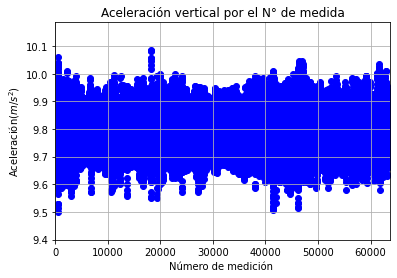

In [34]:
a_z = a[1:p] #aceleración en el eje Z sin Nan
T = t[1:p] #timpo sin Nan
n = len(a_z)
N_med =np.arange(1,n+1) #número de mediciones
print("Aceleración máxima medida",np.amax(a_z))
print("Aceleración mínima medida",np.amin(a_z))
L = np.amax(a_z)+0.1
l = np.amin(a_z)-0.1

plt.scatter(N_med,a_z,c="blue")
plt.grid(True)
plt.xlabel('Número de medición ')
plt.ylabel('Aceleración($m/s^2$)')
plt.xlim(0,len(N_med)+1)
plt.ylim(l,L)
plt.title('Aceleración vertical por el N° de medida')

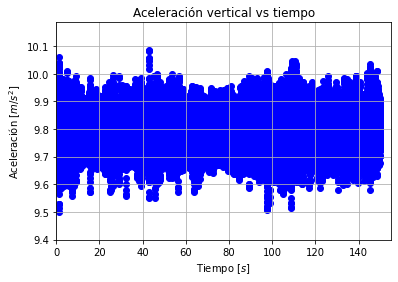

In [35]:
plt.scatter(T,a_z,c="blue")
plt.xlim(0,155)
plt.ylabel('Aceleración $[m/s^2]$')
plt.xlabel('Tiempo $[s]$ ')
plt.xlim(0,155)
plt.ylim(l,L)
plt.title('Aceleración vertical vs tiempo')
plt.grid(True)

In [36]:
valor_medio = np.mean(a_z)
print("El valor medio de los datos es ",valor_medio)
desv_standar = np.std(a_z,ddof=1)
print("La desviación estandar de los datos es",desv_standar)

El valor medio de los datos es  9.805216249977564
La desviación estandar de los datos es 0.0633496880933712


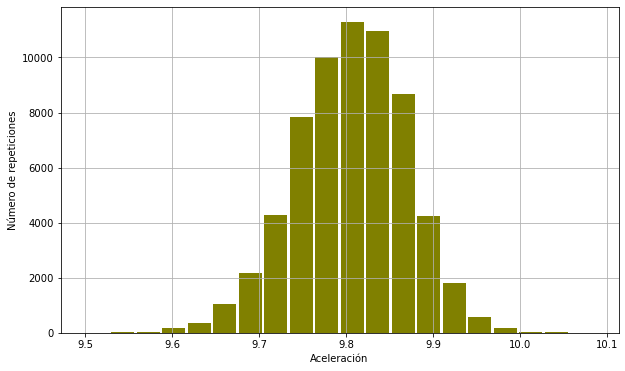

In [37]:
#Histograma
plt.figure(figsize=(10,6))
plt.hist(a_z,bins=20, rwidth=0.90, range=(np.min(a_z),np.max(a_z)), color='olive')
plt.xlabel('Aceleración')
plt.ylabel('Número de repeticiones')
plt.grid(True)

In [38]:
hist, bin_edges = np.histogram(a_z,bins=20)
bin_size = bin_edges[1]-bin_edges[0] # calculo el ancho de los bins del histograma
N=len(a_z) # número de cuentas

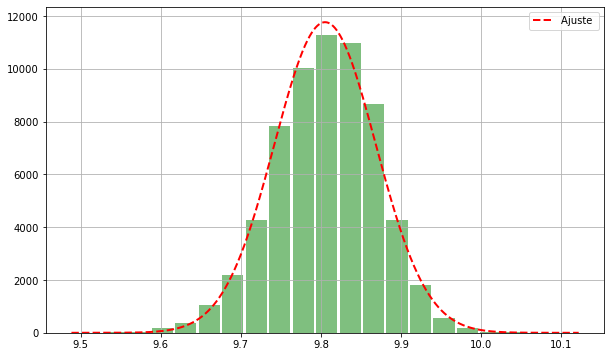

[0.04386871 0.04390314 0.04393759 ... 0.04393759 0.04390314 0.04386871]


In [39]:
mu = np.mean(a_z) #Calcula la media 
sigma =np.std(a_z)
x_gaussiana=np.linspace(mu-5*sigma,mu+5*sigma,num=N) # armo una lista de puntos donde quiero graficar la distribución de ajuste
gaussiana=norm.pdf(x_gaussiana, mu, sigma)*N*bin_size # calculo la gaussiana queplt.plot(x_gaussiana,gaussiana,'r--', linewidth=2, label='ajuste 1') #grafico la gaussiana corresponde al histograma

plt.figure(figsize=(10,6))
plt.plot(x_gaussiana,gaussiana,'r--', linewidth=2, label='Ajuste ') #grafico la gaussiana
plt.hist(a_z,bins=20, rwidth=0.90, range=(np.min(a_z),np.max(a_z)), color='green',alpha = 0.5)
plt.grid(True)
plt.legend()
plt.show()
print(gaussiana)

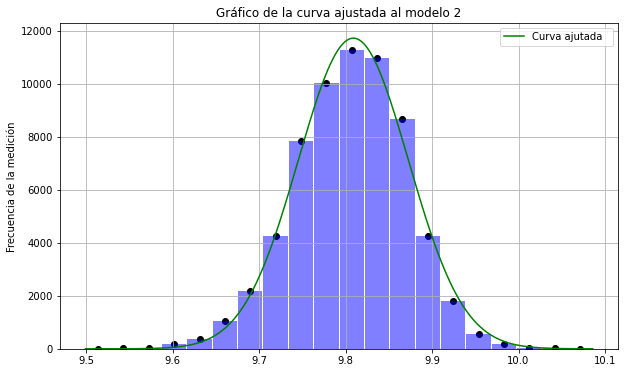

In [41]:
xx = np.linspace(np.min(a_z),np.max(a_z), 2000) 
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2 #(valor del centro de cada "bins")
def gauss(x, *p):
    A, B, C = p
    return (A) *np.exp((-(x-B)**2)/(2*(C**2)))

# pk es la estimación inicial de los coeficientes de ajuste (A, B y C)
pk = [0, 1, 2]

#coeff = parámetros óptimos hallados y matrix = es la matriz de covarianza de los parámetros hallados.

coeff,matrix = curve_fit(gauss, bin_centers, hist,pk)
A,B,C = coeff
hist_ajustado = gauss(bin_centers, *coeff)  #curva ajustada

plt.figure(figsize=(10,6))
plt.scatter(bin_centers,hist, color = "black")
#plt.plot(bin_centers, hist,color = "olive")
plt.plot(xx,gauss(xx,*coeff), label='Curva ajutada  ',color = "green")
plt.hist(a_z, bins=20, color='blue',alpha=0.5,rwidth=0.96)
plt.title('Gráfico de la curva ajustada al modelo 1')
plt.ylabel('Frecuencia de la medición')
plt.title('Gráfico de la curva ajustada al modelo 2')
plt.legend()
plt.grid(True)

Text(0, 0.5, 'Logaritmo natural de frecuencia de la medición')

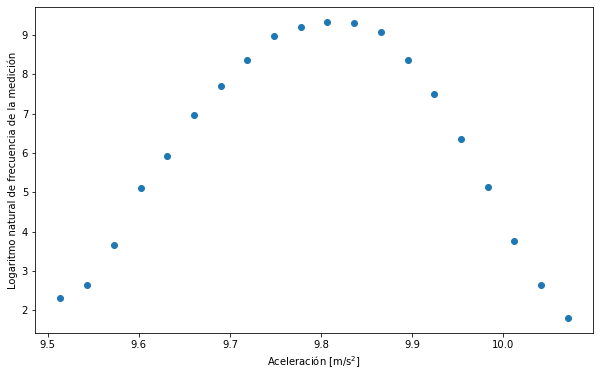

In [42]:
def gauss_2(x, A,B,C):
    return A*np.exp(-B*((x+C)**2)) 
log_hist = np.log(hist) 

plt.figure(figsize=(10,6))
plt.scatter(bin_centers, log_hist)
plt.xlabel('Aceleración [m/s$^2$]')
plt.ylabel('Logaritmo natural de frecuencia de la medición')

Text(0, 0.5, 'Logaritmo natural de frecuencia de la medición')

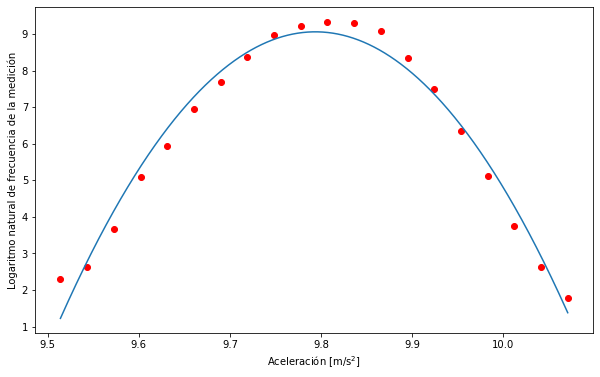

In [43]:
#Ahora el ajuste, a un polinomio de grado 2:
p = np.polyfit(bin_centers,log_hist , 2)
#Evaluamos el polinomio:
x_x = np.linspace(np.min(bin_centers),np.max(bin_centers), 20000)
Pyy = np.polyval(p,x_x)

plt.figure(figsize=(10,6))
plt.scatter(bin_centers, log_hist, c='red')
plt.plot(x_x,Pyy)
plt.xlabel('Aceleración [m/s$^2$]')
plt.ylabel('Logaritmo natural de frecuencia de la medición')


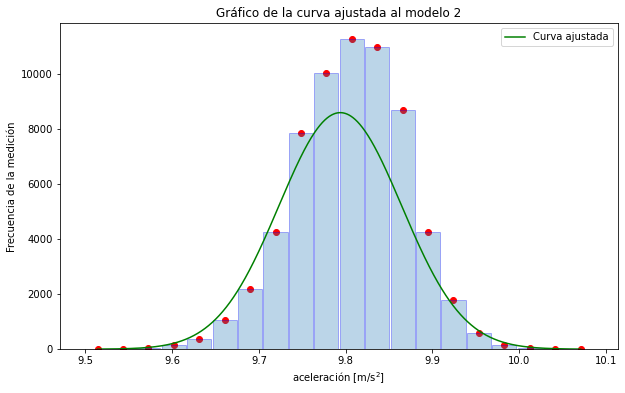

In [44]:
alpha, beta, gamma =p
b = -alpha
c = -beta/(2*b)
a = np.exp(gamma + b*c**2)
y_y = gauss_2(x_x,a,b,c)

plt.figure(figsize=(10,6))
plt.hist(a_z, bins=20, edgecolor='blue', rwidth=0.95, alpha=0.3)
plt.scatter(bin_centers,hist, c='r') 
plt.plot(x_x, y_y, c='green', label='Curva ajustada')
plt.xlabel('Aceleración [m/s$^2$]')
plt.ylabel('Frecuencia de la medición')
plt.xlabel('aceleración [m/s$^2$] ')
plt.ylabel('Frecuencia de la medición')
plt.title('Gráfico de la curva ajustada al modelo 2')
plt.legend()

Text(0.5, 1.0, 'Gráfico de residuos 1')

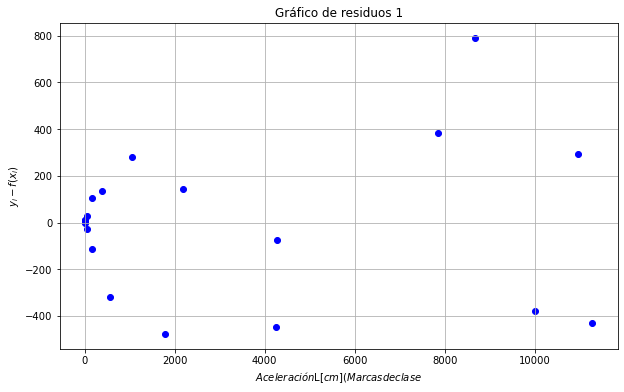

In [47]:
res = hist - gauss(bin_centers,*coeff)

plt.figure(figsize=(10,6))
plt.scatter(hist, res, color='blue')
plt.grid(True)
plt.xlabel('$Aceleración $L$ [cm] (Marcas de clase$')
plt.ylabel('$ y_i -f(x_i)$')
plt.title('Gráfico de residuos 1')

Text(0.5, 1.0, 'Gráfico de residuos 2')

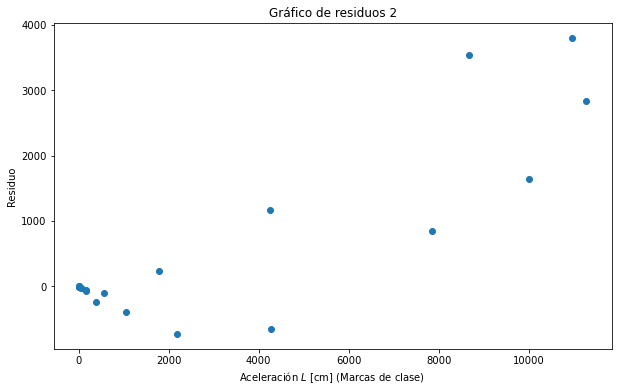

In [562]:
res = (hist - gauss_2(bin_centers,a,b,c))

plt.figure(figsize=(10,6))
plt.scatter(hist, res)
plt.ylabel('Residuo')
plt.xlabel('Aceleración $L$ [cm] (Marcas de clase) ')
plt.title('Gráfico de residuos 2')

In [48]:
SCT = np.sum((hist-np.mean(hist))**2)
SCE = np.sum((hist-gauss(bin_centers,*coeff))**2)
RR= (SCT-SCE)/SCT            
SCT_1 = np.sum((hist-np.mean(hist))**2)
SCE_1 = np.sum((hist-gauss_2(bin_centers,a,b,c))**2)
RR_1= (SCT_1-SCE_1)/SCT_1
print("El coeficinte de determinación para el primer modelo es R^2 =",RR)
print("El coeficinte de determinación para el segundo modelo es R^2= ",RR_1)

El coeficinte de determinación para el primer modelo es R^2 = 0.994308670321005
El coeficinte de determinación para el segundo modelo es R^2=  0.8742966726597321


### De acuerdo a los criterios previamente enunciados, concluimos que el modelo 1 se aunsta mejor a los datos, pero sujeto a la correcta determinación de parametros iniciales. 

## H. Repita nuevamente todo el proceso anterior, pero ahora con el celular en reposo sobre otro celular (o sobre un parlante) que esté emitiendo un tono de frecuencia de 600 Hz (puede generar este tono con la misma aplicación Phyphox).

# Datos medición 3

In [49]:
datos = np.genfromtxt('/home/juangarcia/Escritorio/Tareas Cs. Udec/Tareas S4/Tareas-S4/Laboratorio 1/Tarea 3/Base de datos/Raw_Data3.csv',delimiter=",")
t = datos[:,0] #tiempo con Nan
a = datos[:,3] #aceleración en el eje Z con Nan
p = len(a)
print(p)

63731


Aceleración máxima medida 9.908679008
Aceleración mínima medida 9.781859398


Text(0.5, 1.0, 'Aceleración vertical por el N° de medida')

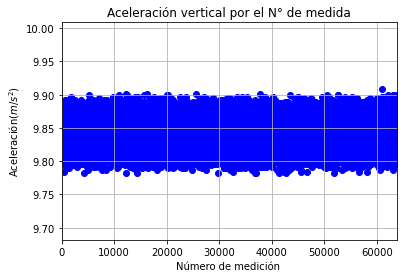

In [50]:
a_z = a[1:p] #aceleración en el eje Z sin Nan
T = t[1:p] #timpo sin Nan
n = len(a_z)
N_med =np.arange(1,n+1) #número de mediciones
print("Aceleración máxima medida",np.amax(a_z))
print("Aceleración mínima medida",np.amin(a_z))
L = np.amax(a_z)+0.1
l = np.amin(a_z)-0.1

plt.scatter(N_med,a_z,c="blue")
plt.grid(True)
plt.xlabel('Número de medición ')
plt.ylabel('Aceleración($m/s^2$)')
plt.xlim(0,len(N_med)+1)
plt.ylim(l,L)
plt.title('Aceleración vertical por el N° de medida')

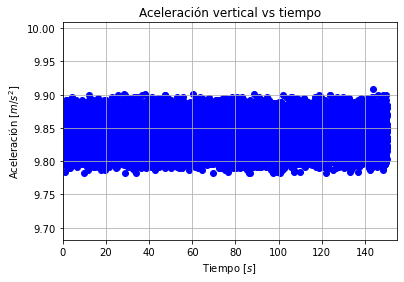

In [51]:
plt.scatter(T,a_z,c="blue")
plt.xlim(0,155)
plt.ylabel('Aceleración $[m/s^2]$')
plt.xlabel('Tiempo $[s]$ ')
plt.xlim(0,155)
plt.ylim(l,L)
plt.title('Aceleración vertical vs tiempo')
plt.grid(True)

In [52]:
valor_medio = np.mean(a_z)
print("El valor medio de los datos es ",valor_medio)
desv_standar = np.std(a_z,ddof=1)
print("La desviación estandar de los datos es",desv_standar)

El valor medio de los datos es  9.842336303145599
La desviación estandar de los datos es 0.01985125387917876


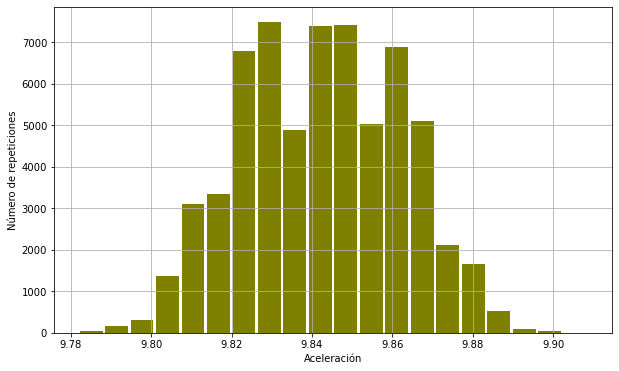

In [53]:
#Histograma
plt.figure(figsize=(10,6))
plt.hist(a_z,bins=20, rwidth=0.90, range=(np.min(a_z),np.max(a_z)), color='olive')
plt.xlabel('Aceleración')
plt.ylabel('Número de repeticiones')
plt.grid(True)

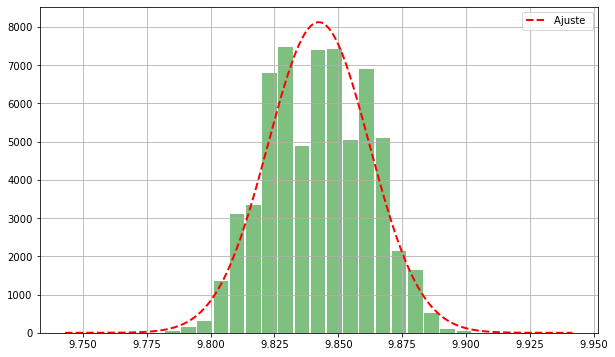

[0.03026529 0.03028904 0.03031282 ... 0.03031282 0.03028904 0.03026529]


In [65]:
hist, bin_edges = np.histogram(a_z,bins=20)
bin_size = bin_edges[1]-bin_edges[0] # calculo el ancho de los bins del histograma
N=len(a_z) # número de cuentas

mu = np.mean(a_z) #Calcula la media 
sigma =np.std(a_z)
x_gaussiana=np.linspace(mu-5*sigma,mu+5*sigma,num=N) # armo una lista de puntos donde quiero graficar la distribución de ajuste
gaussiana=norm.pdf(x_gaussiana, mu, sigma)*N*bin_size # calculo la gaussiana queplt.plot(x_gaussiana,gaussiana,'r--', linewidth=2, label='ajuste 1') #grafico la gaussiana corresponde al histograma

plt.figure(figsize=(10,6))
plt.plot(x_gaussiana,gaussiana,'r--', linewidth=2, label='Ajuste ') #grafico la gaussiana
plt.hist(a_z,bins=20, rwidth=0.90, range=(np.min(a_z),np.max(a_z)), color='green',alpha = 0.5)
plt.grid(True)
plt.legend()
plt.show()
print(gaussiana)

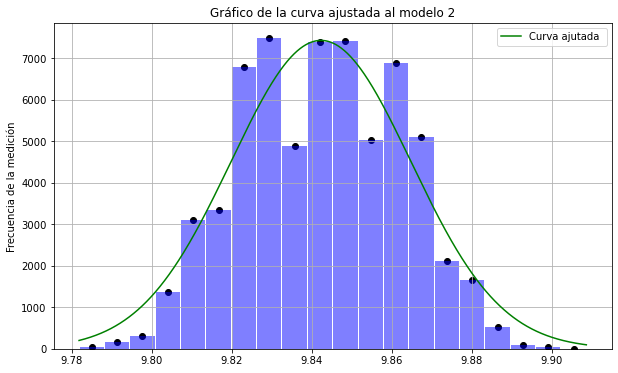

In [73]:
xx = np.linspace(np.min(a_z),np.max(a_z), 2000) 
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2 #(valor del centro de cada "bins")
def gauss(x, *p):
    A, B, C = p
    return (A) *np.exp((-(x-B)**2)/(2*(C**2)))

# pk es la estimación inicial de los coeficientes de ajuste (A, B y C)
pk = [0, 1, 2]

#coeff = parámetros óptimos hallados y matrix = es la matriz de covarianza de los parámetros hallados.

coeff,matrix = curve_fit(gauss, bin_centers, hist,pk)
A,B,C = coeff
hist_ajustado = gauss(bin_centers, *coeff)  #curva ajustada

plt.figure(figsize=(10,6))
plt.scatter(bin_centers,hist, color = "black")
#plt.plot(bin_centers, hist,color = "olive")

plt.plot(xx,gauss(xx,*coeff), label='Curva ajutada ',color = "green")
plt.hist(a_z, bins=20, color='blue',alpha=0.5,rwidth=0.96)
plt.title('Gráfico de la curva ajustada al modelo 1')
plt.ylabel('Frecuencia de la medición')
plt.title('Gráfico de la curva ajustada al modelo 2')
plt.legend()
plt.grid(True)

Text(0, 0.5, 'Logaritmo natural de frecuencia de la medición')

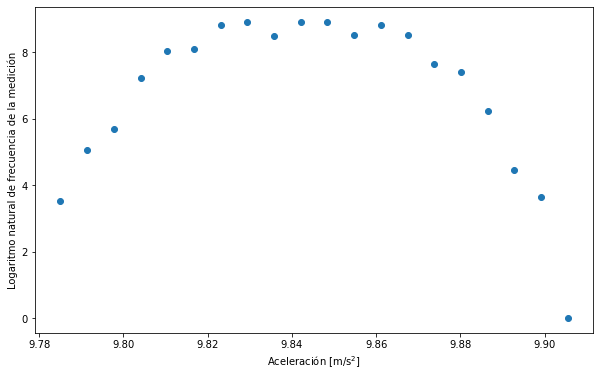

In [58]:
def gauss_2(x, A,B,C):
    return A*np.exp(-B*((x+C)**2)) 
log_hist = np.log(hist) 

plt.figure(figsize=(10,6))
plt.scatter(bin_centers, log_hist)
plt.xlabel('Aceleración [m/s$^2$]')
plt.ylabel('Logaritmo natural de frecuencia de la medición')

Text(0, 0.5, 'Logaritmo natural de frecuencia de la medición')

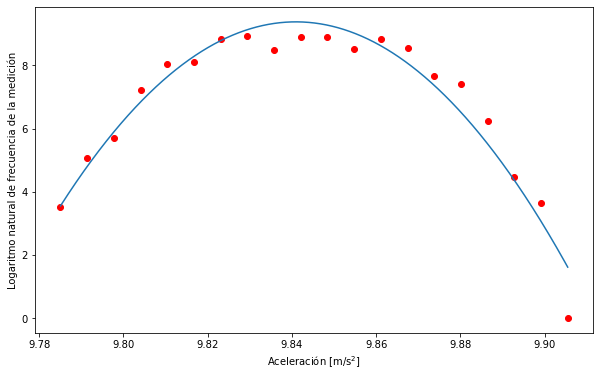

In [59]:
#Ahora el ajuste, a un polinomio de grado 2:
p = np.polyfit(bin_centers,log_hist , 2)
#Evaluamos el polinomio:
x_x = np.linspace(np.min(bin_centers),np.max(bin_centers), 20000)
Pyy = np.polyval(p,x_x)

plt.figure(figsize=(10,6))
plt.scatter(bin_centers, log_hist, c='red')
plt.plot(x_x,Pyy)
plt.xlabel('Aceleración [m/s$^2$]')
plt.ylabel('Logaritmo natural de frecuencia de la medición')


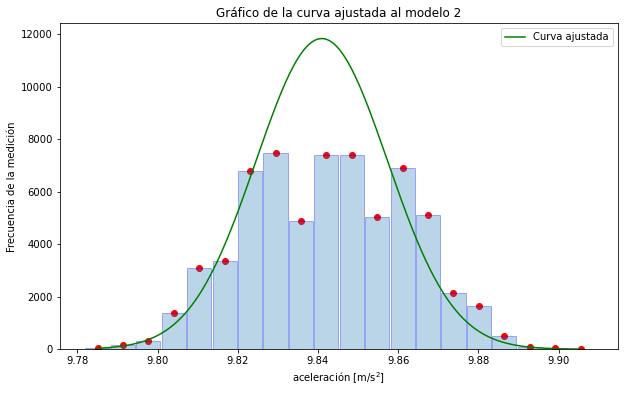

In [60]:
alpha, beta, gamma =p
b = -alpha
c = -beta/(2*b)
a = np.exp(gamma + b*c**2)
y_y = gauss_2(x_x,a,b,c)

plt.figure(figsize=(10,6))
plt.hist(a_z, bins=20, edgecolor='blue', rwidth=0.95, alpha=0.3)
plt.scatter(bin_centers,hist, c='r') 
plt.plot(x_x, y_y, c='green', label='Curva ajustada')
plt.xlabel('Aceleración [m/s$^2$]')
plt.ylabel('Frecuencia de la medición')
plt.xlabel('aceleración [m/s$^2$] ')
plt.ylabel('Frecuencia de la medición')
plt.title('Gráfico de la curva ajustada al modelo 2')
plt.legend()

Text(0.5, 1.0, 'Gráfico de residuos 1')

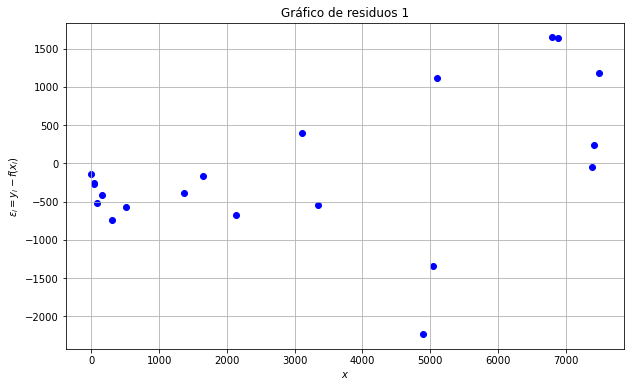

In [74]:
res = hist - gauss(bin_centers,*coeff)

plt.figure(figsize=(10,6))
plt.scatter(hist, res, color='blue')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$\\epsilon_i = y_i -f(x_i)$')
plt.title('Gráfico de residuos 1')

Text(0.5, 1.0, 'Gráfico de residuos 2')

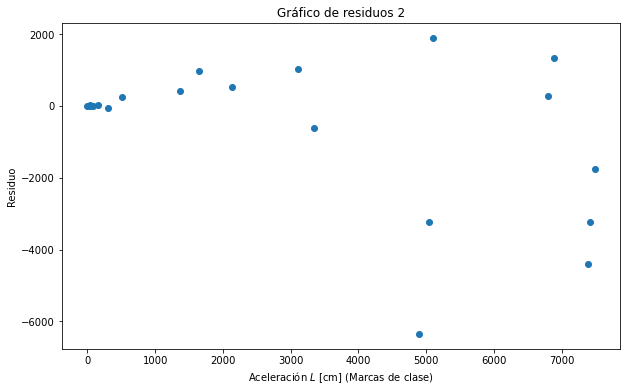

In [62]:
res = (hist - gauss_2(bin_centers,a,b,c))

plt.figure(figsize=(10,6))
plt.scatter(hist, res)
plt.ylabel('Residuo')
plt.xlabel('Aceleración $L$ [cm] (Marcas de clase) ')
plt.title('Gráfico de residuos 2')

In [75]:
CT = np.sum((hist-np.mean(hist))**2)
SCE = np.sum((hist-gauss(bin_centers,*coeff))**2)
RR= (SCT-SCE)/SCT            
SCT_1 = np.sum((hist-np.mean(hist))**2)
SCE_1 = np.sum((hist-gauss_2(bin_centers,a,b,c))**2)
RR_1= (SCT_1-SCE_1)/SCT_1
print("El coeficinte de determinación para el primer modelo es R^2 =",RR)
print("El coeficinte de determinación para el segundo modelo es R^2= ",RR_1)

El coeficinte de determinación para el primer modelo es R^2 = 0.9468289407648378
El coeficinte de determinación para el segundo modelo es R^2=  0.42885997829235795


# Compare, discuta e intente explicar las caracteristicas observadas en sus datos.

## Notamos que los datos para cada medición se distribuyen de diferente manera y se observa lo siguiente

#### Medición 1 
El valor medio de los datos es          $9.842434411986961$

La desviación estandar de los datos es  $0.011172288292462088$

Aceleración máxima medida               $9.891928673$

Aceleración mínima medida               $9.791430473$

#### Medición 2 

El valor medio de los datos es          $9.805216249977564$

La desviación estandar de los datos es  $0.0633496880933712$

Aceleración máxima medida                $10.08574772$

Aceleración mínima medida                $9.499206543$

#### Medición 3 

El valor medio de los datos es           $9.842336303145599$

La desviación estandar de los datos es   $0.01985125387917876$

Aceleración máxima medida                $9.908679008$

Aceleración mínima medida                $9.781859398$


Text(0.5, 1.0, 'Comaparación de mediciones')

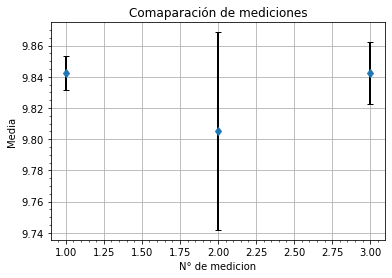

In [72]:
medios = [9.842434411986961,9.805216249977564,9.842336303145599]
desviacion = [0.011172288292462088,0.0633496880933712, 0.01985125387917876]
medicion = [1,2,3]

plt.errorbar(medicion, medios, fmt='d', yerr= desviacion, ecolor='black',  elinewidth=2, capsize=3)
plt.minorticks_on()
plt.grid(True)
plt.xlabel('N° de medicion')
plt.ylabel('Media')
plt.title('Comaparación de mediciones')

En la gráfica comparativa definimos gráficamente a la desviación como el error. Al observar esto, se infiere directamente que los datos medidos con el celular sobre la mano presentan una mayor desviación, esto se condice con el hecho de que la mano al pertenecer a un organismo vivo no permanece en reposo por razones fisiologicas (pulso, impulsos nerviosos, fática muscular, etc) provocando la aparición de ruido en los datos. 

Por otro lado, los datos de  la medida  sobre un celular que emite un sonido a $600 Hz$ presentan mayor ruido con respecto a la medida 1, pero un menor ruido respecto a la medida 2 y esto se debe a que en primer lugar  el sonido emitido por el otro dispositivo genera ondas que se propagan por el materiale constitutivo del celular que mide la aceleración. El sonido genera vibraciones periodicas (ruido) en los sensores provocando la aparación de ruido en los datos. Sin embargo, la desviación de datos es menor que en la medida 3 que en la 2 por motivos relacionados a la naturaleza del ruido: 

#### El ruido es relativamente constante (se debe a oscilaciones periodicas) en la medición 3 y en la medición 2 el ruido es claramente variable

#### El ruido genera mayores desviaciones en la medición 2 que en la medición 3 

Lo anterior nos permite concluir que en las mediciones los errores sistemáticos tienen un impacto en la distribución de los datos; ya que al medir con el mismo dispositivo los mismos datos en condiciones ambientales iguales, la introducción de diferentes fuentes de ruido tuvieron un impacto en los datos medidos. Además a pesar del ruido, en todas las mediciones los datos se distribuyeron de tal manera que fue posible ajustar los histogramas mediante modelos de regresión  a una campana de Gauss. Esto se justifica con la gran cantidad de datos obtenidos en cada experimento. 